# APS 6 - Regressão, variáveis aleatórias e tamanho de amostra


**Nota:** As partes interativas rodam apenas no Jupyter Notebook, não no Jupyter Lab

**Digite as respostas no Blackboard**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats





### Dados para perguntas de 1 a 6

*(Montgomery 6-1)*

A indústria de *fast food* precisa selecionar materiais biodegradáveis para produzir embalagens mais sustentáveis. É desejável que o material tenha um baixo fator $\kappa$ de condutividade térmico  (medido em W/mK). 

Uma abordagem para diminuir o $\kappa$ é reduzir a densidade do material (medida em $g/cm^3$ )

Assuma que é possível ajustar os dados por um modelo de regressão linear.

Queremos *condutividade térmica* **em função** da *densidade* .


| y: Condutividade térmica (W/mK)| x: Densidade de produto (g/cm3)|
|---|---|
|0.0480 | 0.1750|
|0.0525| 0.2200|
|0.0540| 0.2250|
|0.0535| 0.2260|
|0.0570| 0.2500|
|0.0610| 0.2765|

Linhas separadas:

    condutividade = [0.0480, 0.0525, 0.0540, 0.0535, 0.0570, 0.0610]

    densidade = [0.1750, 0.2200, 0.2250, 0.2260, 0.2500, 0.2765]

Pede-se:

**a.** Estime o modelo de regressão encontrando $\hat{\beta_0}$ e $\hat{\beta_1}$ usandos as fórmulas abaixo. 


$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_1} \bar{x}$$

e

$$\hat{\beta_1}= \frac{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})^2} = \frac{S_{xy}}{S_{xx}} $$

Fórmula alternativa que pode ser útil:


$$\hat{\beta}_1 = \frac{Cov(X,Y)}{Var(X)}$$



**Dica:**  converta as listas em array do numpy. Desta forma **não vai precisar fazer loops.**
```python
    x = np.array(densidade)
    x_ = np.mean(x)
```

In [2]:
import numpy as np
from scipy.stats import probplot, t, norm # Norm não foi usada :(
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

densidade = [0.1750, 0.2200, 0.2250, 0.2260, 0.2500, 0.2765]
condutividade = [0.0480, 0.0525, 0.0540, 0.0535, 0.0570, 0.0610]

x = np.array(densidade)
y = np.array(condutividade)

x_ = np.mean(x)
y_ = np.mean(condutividade)



 

Vamos calcular o termo $S_{xy}$

In [3]:
Sxy = np.sum((x - x_)*(y - y_)) # note que as operações são feitas em cada elemento dos arrays x e y

Agora vamos valcular o termo $Sxx$

Agora podemos calcular $\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}}$

### Pergunta 1:

Calcule o $\hat{\beta}_{1}$

### Pergunta 2 - mesmos dados do item anterior

Calcule o $\hat{\beta}_0$

### Pergunta 3

Usaremos a biblioteca `statsmodels` para encontrar $\hat{\beta_0}$ e $\hat{\beta_1}$. Escreva a equação que estima *Condutividade térmica* $y$ em função da *Densidade do produto* $x$

In [4]:
# Vamos trazer a função da aula de regressão
import statsmodels.api as sm
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

#reg = regress(densidade, condutividade) # DESCOMENTE a linha para funcionar
# reg.summary() # DESCOMENTE a linha

Foram obtidos os seguintes resultados da regressão:


<img src=resultados_regressao.png width=50%>

In [5]:
# DESCOMENTE as linhas marcadas acima para funcionar o código abaixo
#beta0s = reg.params[0] # como acessar o beta 0 calculado
#beta1s = reg.params[1] # como acessar o beta 1 e assim por diante


In [6]:
#print("Betas do Statsmodels - Beta 0: {:}   Beta 1 {:}:".format(beta0s, beta1s))

Portanto a equação encontrada foi:

**?**

**Alternativas:**

* $const = 0.0249coef + 0.002$

* $y = 0.128 + 0.0249x$

* $y = 0.0249 + 0.128x$ 

* $const = 0.1285 x1 + 0.008$


### Pergunta 4
Calcule $SS_E$ (SQRes), a soma dos quadrados dos resíduos

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$

Note que o mesmo valor também está guardado no atributo `ssr` os resultados da regressão:

```python
reg.ssr

```

### Pergunta 5

Calcule $SQT$, também chamado de $SS_T$ no livro, que é a **soma dos quadrados totais**:


$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$


### Pergunta 6

Calcule o **coeficiente de determinação $R^2$**

Temos dos livros e da aula de regressão:

$$ R^2 = 1 - \frac{SS_E}{SS_T} = \frac{SS_R}{SS_T}$$

Se usarmos o `statsmodels` podemos obter este valor usando o atributo `rsquared` dos resultados de regressão:
```python
reg.rsquared
```

In [7]:
# reg.rsquared # usando statsmodels

### Pergunta 7

Qual é a condutividade térmica esperada para uma densidade de $0.23g/cm^2?$

### Pergunta 8

*(Montgomery 12-9)*

Os dados abaixo são provenientes de uma pesquisa de satisfação aplicada em um hospital (**também estão disponíveis em [um arquivo CSV](tabela_pacientes.csv)**). 

|Observation| Age| Severity| Surg_Med| Anxiety| Satisfaction|
|---|---|---|---|---|---|
|1|55|50| 0| 2.1| 68|
|2|46|24| 1| 2.8| 77|
|3|30|46| 1| 3.3| 96|
|4|35|48| 1| 4.5| 80|
|5|59|58| 0| 2.0| 43|
|6|61|60| 0| 5.1| 44|
|7|74|65| 1| 5.5| 26|
|8|38|42| 1| 3.2| 88|
|9 |27|42| 0| 3.1| 75|
|10|51|50 |1 |2.4 |57 |
|11|53|38 |1 |2.2 |56|
|12|41|30 |0 |2.1 |88|
|13|37|31 |0 |1.9 |88|
|14|24|34 |0 |3.1 |102|
|15|42|30 |0 |3.0 |88|
|16|50|48 |1 |4.2 |70|
|17|58|61 |1 |4.6 |52|
|18|60|71 |1 |5.3 |43|
|19|62|62 |0 |7.2 |46|
|20|68|38 |0 |7.8 |56|
|21|70|41 |1 |7.0 |59|
|22|79|66 |1 |6.2 |26|
|23|63|31 |1 |4.1 |52|
|24|39|42 |0 |3.5 |83|
|25|49|40 |1 |2.1 |75|

As variáveis são:

* `Age` - a idade do paciente
* `Severity` - quão severa é a condição. Valores mais altos indicam condição mais preocupante
* `Surg-Med` - Indica se é um paciente de visita ao médico `0` ou cirurgia `1`
* `Anxiety` - Índice de ansiedade. Valores mais elevados indicam maior ansiedade



Você fez o modelo de regressão (presente no Jupyter) e obteve os seguintes resultados

In [8]:
import pandas as pd

q2 = pd.read_csv("tabela_pacientes.csv")
q2.head(3)

,Observation,Age,Severity,Surg_Med,Anxiety,Satisfaction
0,1,55,50,0,2.1,68
1,2,46,24,1,2.8,77
2,3,30,46,1,3.3,96


Resultados da regressão

<img src=regressao_multipla_satisfaction.png width=40%>

Sobre os resultados acima, pode-se dizer:

* A variável mais significativa é Anxiety, pois ela tem maior probabilidade de estar certa

* Não conseguimos refutar a hipótese nula de que o coeficiente beta que precede Anxiety é na verdade zero, portanto poderíamos tentar descartar este coeficiente

* A equação encontrada é Satisfaction=143.89 -0.584Age - 1.11Severity + 1.296Anxiety

* O coeficiente R quadrado de 0.90 diz que a regressão explica muito pouco da variação quadrada presente nos dados

### Pergunta 9

In [9]:
colunas_x = ["Age", "Severity", "Anxiety"]

x_q2 = q2.loc[:, colunas_x]
y_q2 = q2.Satisfaction

In [10]:
# reg2 = regress(x_q2, y_q2)
# reg2.summary()

O modelo encontrado, a partir dos resultados da regressão logo acima, foi:

* $Satisfacao = 143.895 -1.113Age -0.585 Severity + 1.296 Anxiety$

* $Satisfaction=143.89 -0.584Age - 1.11Severity + 1.296Anxiety$

* $Satisfaction = 24.39 -8.39Age - 4.43Severity + 1.227 Anxiety$

* $Satisfaction = 24.39 -8.39Age - 4.43Severity + 1.227 Anxiety$


### Pergunta 10


Marque o que é verdadeiro sobre regressão linear e as suposições do modelo:

* Os resíduos não seguem uma distribuição normal

* Não existe relação linear entre a variável dependente e as preditoras

* A variável resultado da regressão é chamada de preditora e geralmente chamada de y

* A variável resultado da regressão é chamada de variável dependente e geralmente é chamada de y

* Os resíduos dependem do valor anterior do resíduo - são correlacionados

* É preciso ter heterocedasticidade - uma tendência visível na variação dos resíduos



### Pergunta 11

Sobre os testes de hipótese da regressão, marque o falso:

* A $Prob(\text{F-statistic})$ testa a hipótese nula de que $H_0: \mbox{todo } \beta_i = 0$, para $i > 1$ , ou seja, os dados seriam equivalentes a uma constante sem coeficientes na regressão

* Os valores $P > |t|$  testam, para cada $\beta_i$, a hipótese nula  de que $H_0: \beta_i = 0$

* Pode-se usar sem preocupações a regressão para valores fora da faixa observada para as variáveis preditoras

* Os testes *Omnibus* e *JB* testam a hipótese nula de que os resíduos **são normais** . Portanto valores altos para $Prob(JB)$ e $Prob(Omnibus)$ confirmam as suposições da regressão





### Pergunta 12 - Variáveis aleatórias

As variáveis aleatórias $X_1$ e $X_2$ são, respectivamente, o comprimento e largura de uma peça retangular manufaturada. 

Sabe-se que $X_1$ é uma v.a. normal com $E(X_1)=2cm$ e $\sigma_1=0.1cm$, e que $X_2$ é normal com $E(X_2)=5cm$ e    $\sigma_2=0.2cm$

Podemos assumir que $X_1$ e $X_2$ são independentes. 

Quanto vale o valor esperado do perímetro?

### Pergunta 13

No mesmo problema do exercício anterior, quanto vale o desvio padrão do perímetro?

Dica: o perímetro é a variável $Y = 2X_1 + 2X_2$

## Suporte interativo para o exercício 14 de erro beta

Pergunta: de quantos elementos precisamos para que o erro $\beta$ seja menor que $1\%$

In [11]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#Função que utiliza o pywidget
@interact(𝛼 = (0.01, 0.1, 0.01), μ0=(2.6, 7, 0.1),  μ1 = (3,9,0.1), n=(1,30))
def f( μ0 = 4.5, μ1 = 7, 𝛼=0.05, n=1):
    
    σ = 1.5

    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    
    #Fit NORMAL sob H0
    eixo_x_1 = -0.1*min(μ0,μ1)
    eixo_x_2 = 1.6*max(μ0,μ1)

    x = np.linspace(eixo_x_1, eixo_x_2, 1000)
    xcritico = stats.norm.ppf(1-𝛼, loc = μ0, scale=σ/n**0.5)
    
    ax1.plot(x, stats.norm.pdf(x, loc = μ0, scale = σ/n**0.5), color = 'b')
    ax1.fill_between(x,stats.norm.pdf(x, loc = μ0, scale = σ/n**0.5), where = x >= xcritico, color='b')
    ax1.plot(x, stats.norm.pdf(x, loc = μ1, scale = σ/n**0.5), color = 'r')
    ax1.fill_between(x,stats.norm.pdf(x, loc = μ1, scale = σ/n**0.5), where = x <=xcritico, color='r')
    
    ax1.axvline(x=xcritico, color='g', lw=4)    
    𝛽 = stats.norm.cdf(xcritico, loc = μ1, scale = σ/pow(n,0.5))
    poder = 1 - 𝛽
    ax1.set_xlabel("Médias amostrais")
    ax1.legend(("Sob H0", "Sob H1", "xcritico"))
   # plt.text(μ1, 1.1*stats.norm.pdf(μ1, loc=μ1, scale=σ/n**0.5), "Erro beta: {:3f}".format(𝛽))
   # plt.text(μ1, stats.norm.pdf(μ1, loc=μ1, scale=σ/n**0.5), "poder=1-beta : {:3f}".format(poder))
    return "xcritico: {0:0.4f}, β: {1:0.4f}, Poder: {2:0.3f}".format(xcritico,𝛽, poder)

interactive(children=(FloatSlider(value=4.5, description='μ0', max=7.0, min=2.6), FloatSlider(value=7.0, descr…

**Só funciona no Jupyter Notebook**

'xcritico: 6.9673, β: 0.4913, Poder: 0.509'

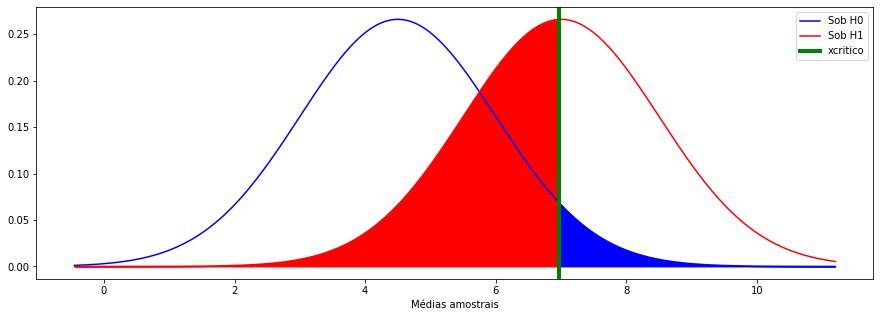

In [12]:
f()

## Pergunta 14 - Tamanho da amostra e erro beta

Atenção: faixas de valores e explicações alteradas para propósitos do exercício. 

A hemoglobina glicada (HBA1c) é uma medida de quão altos foram os núveis de açúcar no sangue de uma determinada pessoa ao longo de aproximadamente 3 meses.  Em função da dinâmica dos reagentes, este teste apresenta uma grande variação para uma mesma pessoa. Por isso devem ser coletados vários frascos de sangue para se obter uma amostra com $n$ elementos.

Sabe-se que:

* Pessoas normais têm HBA1c de $4.5 mmol/L$

* Pessoas com diabetes tendem a ter a HBA1c de $7.0 mmol/L$

Ambos os grupos têm desvio padrão $\sigma=1.5$ O nível de significância adotado é $\alpha=1\%$, a partir deste valor definimos o $x_{crítico}$ e a região de rejeição. Valores de $\overline{x}$ abaixo de $x_{critico}$ não levam à rejeição de $H_0$



Pergunta: Quantos elementos precisa ter uma amostra para termos o erro $\beta$ menor que $1\%$?

**Dica: use o notebook interativo para visualizar e realizar a análise**

![](erro_beta_n_equals_1_legendas.png)

**Resposta**

Use o widget interativo para encontrar. **Entenda** o que é o erro beta

## Pergunta 15 - erros no teste de hipóteses

Pergunta: O que é o erro $\beta$? 

* É o erro do Tipo 1: ou seja aceitar $H_0$ quando ela é verdade. Também chamado *falso positivo*

* É o erro do Tipo 1: ou seja rejeitar $H_0$ quando ela é verdadeira. Também chamado *falso positivo*

* É o erro do Tipo 2: ou seja não rejeitar $H_0$ quando ela é falsa. Também chamado *falso negativo*

* É o erro do Tipo 2: ou seja não rejeitar $H_0$ quando ela é falsa. Também chamado *falso negativo*

## Pergunta 16 - Interpretação de erros

No exercício acima, qual seria a interpretação de cometer um erro do *Tipo 2*?


* Rejeitar $H_0$, ou seja considerar doente uma pessoa saudável

* Não rejeitar $H_0$, ou seja: considerar saudável uma pessoa doente

* Rejeitar $H_1$, ou seja considerar saudável uma pessoa doente

* Não rejeitar $H_1$, ou seja coniderar doente uma pessoa saudável

## Pergunta 17 - Tamanho da amostra e distância da estimativa

<img src=barras_aco.png width=50% alt="barras de aço">

Você trabalha em uma empresa que produz barras de aço.

Seu trabalho é fornecer uma estimativa da média da resistência à tração da produção da fábrica. Você não pode errar por mais que $12MPa$.

Vai ser necessário fazer [um ensaio de tração](https://www.youtube.com/watch?v=CMdKW09HWzs) em  um  certo número de barras 

Você conhece o desvio padrão da produção, que é de $36MPa$. Note que $1Pa=1N/m_2$.

A média $\mu_0$ não é conhecida e é justamente o que você gostaria de estimar (por meio de $\overline{x}$). Sabe-se que a produção de fábricas do mesmo tipo costuma ter distribuição normal.

Quantos elementos $n$ você vai precisar incluir na sua amostra de ensaio para garantir que a média $\overline{x}$ se encontre a menos de $6MPa$ da média verdadeira da produção em $97\%$ das vezes?





Lembrete: a relação para tamanho da amostra é $n = \left( z_{\gamma/2} \frac{\sigma}{d}\right)^2$, em que $z_{\gamma/2}$ é o valor $z$ na normal padrão que delimita de forma simétrica a probabilidade $\gamma$ em torno da média